In [9]:
# Tích chập 1 chiều
def conv1d(a, w, b = 0, stride = 1, pad = 0):
    """
    compute 1d convolutional (with bias)
    """
    w_old = a.shape[0]
    f = w.shape[0]
    a_pad = np.pad(a, pad_width=pad, mode = 'constant', constant_values = 0)
    w_new = int((w_old - f + 2*pad)/stride) + 1 
    a_res = np.zeros((w_new))
    for i in range(w_new):
        start = i*stride
        end = start + f
        a_res[i] = np.sum(a_pad[start:end]*w) + b 
    return a_res 


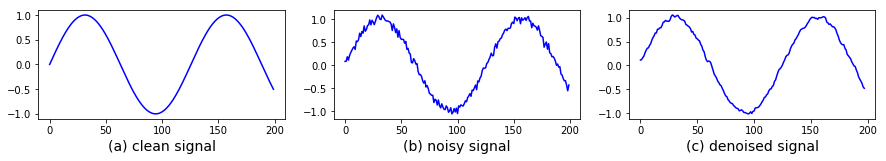

In [10]:
import numpy as np

N = 200
x_clean = np.sin(np.arange(N)/20.)
x_noisy = x_clean + .05*np.random.randn(N)
w = 1./3*np.ones(3)
x_filtered = conv1d(x_noisy, w) 

from matplotlib import pyplot as plt 
fig = plt.figure(figsize = (15, 2))
plt.subplot(131)
plt.plot(x_clean, 'b')
plt.xlabel('(a) clean signal', fontsize=14 )
# plt.axis('off')

plt.subplot(132)
plt.plot(x_noisy, 'b')
plt.xlabel('(b) noisy signal', fontsize=14 )
# plt.axis('off')
plt.subplot(133)
plt.plot(x_filtered, 'b')
plt.xlabel('(c) denoised signal', fontsize=14 )
fig.savefig('conv1d.png', bbox_inches='tight', dpi=600)
plt.show() 
# plt.axis('off')

# Convolutional 2D

In [8]:
#Tích chập 2 chiều
def conv2d_11(A, W, b = 0, stride = 1, pad = 0):
    """
    A: input, A.shape = (n_H_old, n_W_old)
    W: filter, W.shape = (f, f)
    """
    n_H_old, n_W_old = A.shape
    f, f = W.shape
    A_pad = np.pad(A, pad_width=pad, mode = 'constant', constant_values = 0)
    # new shape 
    n_H_new = int((n_H_old - f + 2*pad)/stride) + 1 
    n_W_new = int((n_W_old - f + 2*pad)/stride) + 1 
    # result
    A_res = np.zeros((n_H_new, n_W_new))
    # compute 
    for h in range(n_H_new):
        for v in range(n_W_new):
            h_start = h*stride 
            h_end = h_start + f
            v_start = v*stride 
            v_end = v_start + f
            A_res[h, v] = np.sum(A_pad[h_start:h_end, v_start:v_end] * W) + b 
    return A_res 


# Thêm nhiễu và khử nhiễu

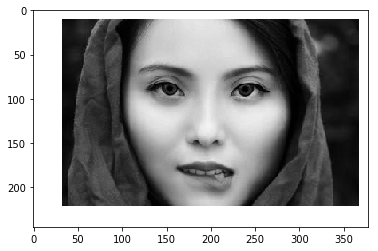

In [28]:
# add noise
import imageio
fn = 'girl'
img_rgb = imageio.imread(fn + '.png')
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
img_gray = rgb2gray(img_rgb)
plt.imshow(img_gray,  cmap=plt.get_cmap('gray'))
plt.show()

# Dò cạnh

In [29]:
f = np.array([[-1, 0, 1], 
              [-1, 0, 1], 
              [-1, 0, 1]])
img_ver_edge = conv2d_11(img_gray, f)
# myshow(np.abs(conv2d(img_gray, f)))

In [30]:
f = np.array([[-1, -1, -1], 
              [0, 0, 0], 
              [1, 1, 1]])
# myshow(np.abs(conv2d(img_gray, f)))
img_hor_edge = conv2d_11(img_gray, f)

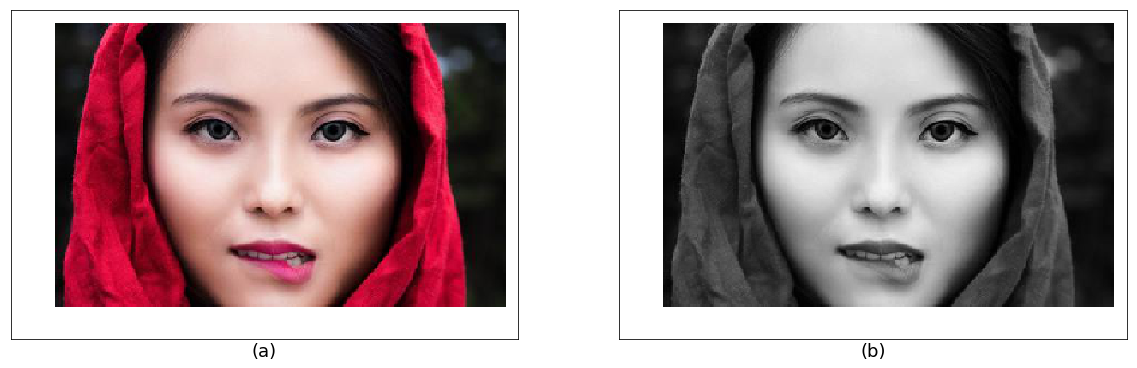

In [31]:
fig = plt.figure(figsize = (20, 10))
plt.subplot(121)
plt.imshow(img_rgb, 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(a)', fontsize = 18)

plt.subplot(122)
plt.imshow(img_gray, 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(b)', fontsize = 18)


plt.show()

fig.savefig(fn + '_rgbgray.png', bbox_inches='tight', dpi = 600)

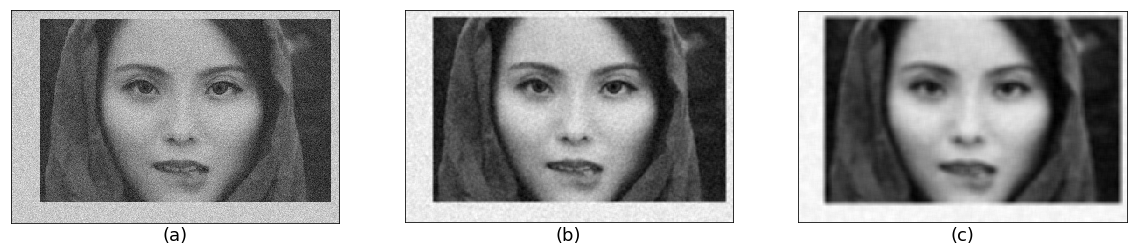

In [33]:
img_noisy = img_gray + np.random.randn(*img_gray.shape)*20
f = 3
w = 1./9**2*np.ones((f, f))
img_denoised = conv2d_11(img_noisy, w)

f = 7
w = 1./9**2*np.ones((f, f))
img_denoised_blurred = conv2d_11(img_noisy, w)

fig = plt.figure(figsize = (20, 10))
plt.subplot(131)
plt.imshow(img_noisy, 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(a)', fontsize = 18)

plt.subplot(132)
plt.imshow(img_denoised, 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(b)', fontsize = 18)

plt.subplot(133)
plt.imshow(img_denoised_blurred, 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(c)', fontsize = 18)

plt.show()

fig.savefig(fn + '_denoise.png', bbox_inches='tight', dpi = 600)

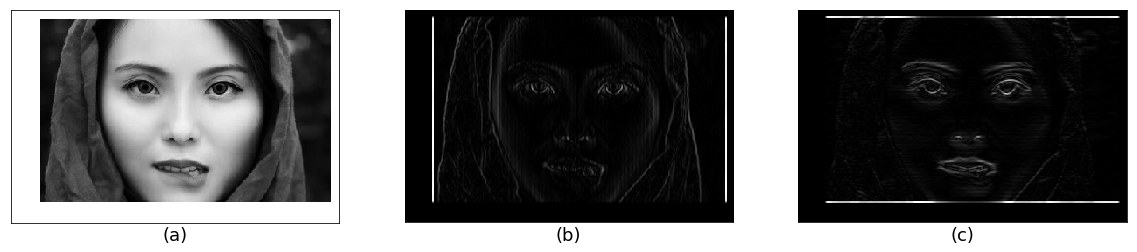

In [34]:
fig = plt.figure(figsize = (20, 10))
plt.subplot(131)
plt.imshow(10*np.abs(img_gray), 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(a)', fontsize = 18)
plt.subplot(132)
plt.imshow(10*np.abs(img_ver_edge), 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(b)', fontsize = 18)

plt.subplot(133)
plt.imshow(10*np.abs(img_hor_edge), 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(c)', fontsize = 18)
fig.savefig(fn + '_edge.png', bbox_inches='tight', dpi = 600)
plt.show()

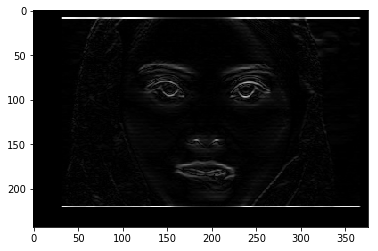

In [35]:
k = 7
f = 1./k**2*np.ones((k, k))
img_denoised_blurred = conv2d_11(img_noisy, f)
plt.imshow(img_denoised_blurred, 'gray')

f = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])/159.
# myshow(np.abs(conv2d(img_gray, f)))
img_canny_edge = conv2d_11(img_gray, f)

plt.imshow(np.abs(img_canny_edge), 'gray')
plt.show()

In [4]:
# Tích chập 2 chiều tổng quát
def conv2d(A, W, b, stride=1, pad=0):
    """
    A: input, A.shape = (m, in_height, in_width, in_channel)
    W: filters, W.shape = (f, f, in_channel, out_channel)
    b: biases, b.shape = (out_channel)
    """
    assert A.shape[3] == W.shape[2],\
        'number of input channels ({}) in A != number of input channels ({}) in W'.format(
            A.shape[3], W.shape[2]
        )
    m, in_height, in_width, _ = A.shape
    f, _, in_channel, out_channel = W.shape
    A_pad = np.pad(A, ((0, 0), (pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values=0)
    # new shape
    out_height = int((in_height - f + 2*pad)/stride) + 1
    out_width = int((in_width - f + 2*pad)/stride) + 1
    A_res = np.zeros((m, out_height, out_width, out_channel))

    for i in range(m):
        for h in range(out_height):
            for w in range(out_width):
                for c in range(out_channel):
                    h_start = h*stride
                    h_end = h_start + f
                    w_start = w*stride
                    w_end = w_start + f
                    a_slide = A_pad[i, h_start: h_end, w_start:w_end, :]
                    A_res[i, h, w, c] = np.sum(a_slide * W[:, :, :, c]) + b[c]
    return A_res